In [2]:
# Imports
import pandas as pd
import chardet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
movie_titles = pd.read_csv('movie_titles.txt', 
    encoding="ISO-8859-1", 
    sep = ',',
    usecols=[0, 1, 2])
display(movie_titles)

,Movie_ID,Year,Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [4]:
print(movie_titles["Title"])

0                                          Dinosaur Planet
1                               Isle of Man TT 2004 Review
2                                                Character
3                             Paula Abdul's Get Up & Dance
4                                 The Rise and Fall of ECW
                               ...                        
17765    Where the Wild Things Are and Other Maurice Se...
17766                    Fidel Castro: American Experience
17767                                                Epoch
17768                                          The Company
17769                                         Alien Hunter
Name: Title, Length: 17770, dtype: object


In [5]:
netflix_ratings = pd.read_csv('netflix_ratings.txt', 
    encoding="ascii", 
    sep = ' ', 
    header=None)
movie_count = netflix_ratings.iloc[:,0].nunique()
print("Number of movies:", movie_count)

Number of movies: 17770


In [6]:
# Used to select only a subset of the entire dataset of ranked movies
netflix_ratings = netflix_ratings[netflix_ratings.iloc[:, 0].between(1, 500)]
netflix_ratings.columns = ["M_ID", "M_Year", "U_ID", "U_Rating", "U_Date"]
display(netflix_ratings)

,M_ID,M_Year,U_ID,U_Rating,U_Date
0,1,2003.0,1488844,3,2005-09-06
1,1,2003.0,822109,5,2005-05-13
2,1,2003.0,885013,4,2005-10-19
3,1,2003.0,30878,4,2005-12-26
4,1,2003.0,823519,3,2004-05-03
...,...,...,...,...,...
2798699,500,2002.0,651950,4,2005-06-28
2798700,500,2002.0,924510,3,2005-07-12
2798701,500,2002.0,965381,3,2005-08-19
2798702,500,2002.0,822391,1,2004-11-04


In [7]:
def get_usr_ratings(id):
    if netflix_ratings['U_ID'].isin([id]).any():
        temp_df = netflix_ratings[netflix_ratings['U_ID'] == id]
        merged_df = pd.merge(temp_df, movie_titles, left_on='M_ID', right_on='Movie_ID')
        merged_df.set_index('M_ID', inplace=True)
        merged_df["M_Year"] = merged_df["M_Year"].astype(int)
        merged_df["Year"] = merged_df["Year"].astype(int)
        display(merged_df)
    else:
        print("User with id", id, "does not exist. Try another one.") 

In [8]:
print(netflix_ratings.columns)
print(movie_titles.columns)

Index(['M_ID', 'M_Year', 'U_ID', 'U_Rating', 'U_Date'], dtype='object')
Index(['Movie_ID', 'Year', 'Title'], dtype='object')


## Create dataframe for PCA

In [9]:
#merging netflic ratings and movie titles (actually not useful at all)
merged_df = pd.merge(netflix_ratings, movie_titles, left_on='M_ID', right_on='Movie_ID')

#making data frame where all movie ratings are given in rows with all user ratings as cloumns
PCA_df = pd.pivot_table(merged_df, values='U_Rating', index='M_ID', columns='U_ID')

#droping all columns where all values are Nan. These columns are not useful to us.
#PCA_df = PCA_df.dropna(axis=1, how='all')

#Ended up dropping all columns where there are less then a fourt of the column with actual values, 
#dont know if i should actually do this, but it is easy to correct.
PCA_df = PCA_df.dropna(axis=1, thresh=len(PCA_df) / 4)


#replacing NaN with 0, to be able to calculate mean
PCA_df = PCA_df.fillna(0)

display(PCA_df)

U_ID,16272,57633,303948,305344,322009,387418,491531,504620,507603,525356,...,2147527,2237185,2238060,2291306,2297136,2439493,2457095,2537543,2606799,2625420
M_ID,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,1.0,3.0,1.0,5.0,2.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
3,4.0,4.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,0.0
4,2.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,2.0
497,0.0,4.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
498,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0


## Make it column wise zero empirical mean (normalizing)

In [10]:
#Ensuring column wise zero empirical mean by subtracting the mean of each column from each value in the column.
normalized_PCA_df = PCA_df - PCA_df.mean(axis=0)
display(normalized_PCA_df)

U_ID,16272,57633,303948,305344,322009,387418,491531,504620,507603,525356,...,2147527,2237185,2238060,2291306,2297136,2439493,2457095,2537543,2606799,2625420
M_ID,,,,,,,,,,,,,,,,,,,,,
1,3.076,-0.878,-1.414,-0.8,1.958,-0.744,3.874,1.428,-0.482,1.222,...,-0.68,-0.976,-1.368,0.43,-0.452,-0.124,-0.806,4.28,-1.332,-0.822
2,-0.924,-0.878,-1.414,-0.8,-1.042,-0.744,-1.126,-0.572,0.518,-0.778,...,0.32,-0.976,-1.368,-0.57,-0.452,-0.124,-0.806,-0.72,-0.332,1.178
3,3.076,3.122,-1.414,0.2,-1.042,0.256,-1.126,-0.572,-0.482,-0.778,...,0.32,3.024,-1.368,1.43,-0.452,-0.124,0.194,-0.72,0.668,-0.822
4,1.076,-0.878,0.586,-0.8,-1.042,0.256,-1.126,-0.572,-0.482,-0.778,...,-0.68,-0.976,-1.368,0.43,-0.452,-0.124,-0.806,-0.72,-1.332,-0.822
5,-0.924,-0.878,-1.414,-0.8,-1.042,-0.744,-0.126,0.428,0.518,-0.778,...,0.32,-0.976,-1.368,-0.57,-0.452,-0.124,-0.806,-0.72,-0.332,-0.822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,-0.924,-0.878,-1.414,-0.8,-1.042,-0.744,-1.126,-0.572,0.518,-0.778,...,0.32,-0.976,-1.368,-0.57,-0.452,-0.124,-0.806,0.28,1.668,1.178
497,-0.924,3.122,-1.414,-0.8,-1.042,1.256,-1.126,-0.572,0.518,-0.778,...,-0.68,-0.976,-1.368,-0.57,-0.452,-0.124,-0.806,-0.72,-1.332,1.178
498,-0.924,-0.878,-1.414,1.2,-1.042,1.256,-1.126,-0.572,-0.482,-0.778,...,-0.68,-0.976,-1.368,-0.57,-0.452,-0.124,3.194,-0.72,-1.332,-0.822


## PCA

In [44]:
def do_PCA(datadrame):
    # Normalisation 
    normalized_PCA_df = datadrame - datadrame.mean(axis=0)
    
    # compute the covariance matrix of the standardized data
    covariance_matrix = np.cov(normalized_PCA_df.T)

    # compute the eigenvectors and eigenvalues of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # sort the eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # select the principal components to keep
    total_variance = np.sum(sorted_eigenvalues)
    variance_explained = sorted_eigenvalues / total_variance
    cumulative_variance = np.cumsum(variance_explained)

    # keep the principal components that explain 95% of the variance
    num_components = np.argmax(cumulative_variance >= 0.95) + 1
    #num_components = normalized_PCA_df.shape[1]
    principal_components = sorted_eigenvectors[:, :num_components]

    # project the data onto the selected principal components
    transformed_data = np.dot(normalized_PCA_df, principal_components)
    
    return pd.DataFrame(transformed_data)

## Creating two PCA dataframes

In [55]:
# Calculate the midpoint for column splitting
midpoint = len(PCA_df.columns) // 2

# Split the dataframe into two halves
df1 = PCA_df.iloc[:, :midpoint]  # First half of columns
df2 = PCA_df.iloc[:, midpoint:]  # Second half of columns

PCA_df_1 = do_PCA(df1)
PCA_df_2 = do_PCA(df2)

display(PCA_df_1)
display(PCA_df_2)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.483385,-1.574123,2.661245,2.276674,-3.283522,2.590626,0.858178,2.410833,-2.775346,0.372444,...,1.382462,0.178120,-1.224044,1.730874,0.103345,1.975272,-1.879007,-1.005769,-0.211213,1.171026
1,-4.766807,0.271768,0.044809,0.421963,0.433614,-0.629026,0.193027,0.368495,0.167958,-0.255886,...,-0.060476,-0.278286,0.201610,-0.600844,-0.210900,0.748572,0.265460,1.209955,-0.379234,0.584811
2,0.987577,-4.546462,-1.596311,-4.837517,-0.167838,-0.947707,1.705757,0.003598,-0.056536,0.342059,...,1.163722,-1.630186,0.646309,0.624860,-0.549158,0.668809,2.224108,-0.166021,2.533516,1.184933
3,-4.101608,0.022484,0.463794,0.956680,0.083218,-0.672922,0.262183,-0.534805,-0.725591,0.530189,...,0.099348,0.053688,0.760439,-0.431391,0.213301,1.507732,0.121687,0.130369,1.094284,0.365438
4,-3.383174,1.955715,0.098784,-0.210003,-0.759653,0.845733,-0.996715,1.768485,1.464237,-0.871122,...,0.724186,0.203944,-0.679443,-0.555562,-0.397730,0.087290,0.688008,0.993911,-0.436749,1.079240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-4.685093,0.478948,-0.186786,0.190737,0.509599,-0.050607,0.415202,-0.808407,-0.541815,0.240584,...,0.193691,-0.254096,-0.711565,0.120715,0.334747,0.011851,0.447030,0.187222,-0.018207,-0.014806
496,-0.586096,-4.468874,2.412566,0.687255,1.934497,-0.762174,-1.868327,-0.285368,1.369045,0.167308,...,-1.508769,-2.073976,-0.380266,0.111786,-0.702700,0.241277,-0.251670,0.387638,0.699422,-0.187721
497,-3.880725,-0.638265,0.934222,0.190972,-1.404797,-0.010748,0.856560,-1.190363,-0.781351,-0.777897,...,-0.515024,0.275578,0.262418,-0.201255,-0.621610,0.236266,-0.689997,0.722418,-2.926721,-0.642054
498,3.620985,1.233448,3.456682,-2.336982,-2.071478,0.347124,-2.017690,-1.293540,-2.028469,2.140494,...,-1.055089,0.064187,-0.915041,0.471350,-0.329504,-0.503437,-1.708079,0.211700,-0.423422,-0.447887


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.526436,0.151696,-2.581266,-0.697627,-1.829819,1.108556,0.398293,-1.800158,1.185083,-2.414726,...,-2.476722,0.664751,1.296946,-0.332735,-3.413200,-0.244399,-1.279585,0.244998,1.331062,-0.374427
1,-2.413920,1.520597,-2.082305,-0.401899,-1.047858,-1.430418,-2.470724,-1.608359,-0.431285,1.030620,...,-0.908515,1.109334,-0.036547,0.350220,0.760363,-0.161180,0.421894,0.140224,-0.247003,0.550578
2,1.308753,-5.016001,1.096371,1.912581,0.177943,-2.217077,0.280501,1.845468,-1.010159,1.020367,...,1.091067,1.709020,-0.575070,0.382515,-1.094096,0.484200,0.256976,0.247772,-0.801977,-0.459427
3,-4.603384,0.094866,-0.075104,0.083286,0.195402,-0.486119,0.037044,-0.281090,-0.534581,-0.551974,...,-0.318807,-0.089294,-0.133963,-0.055948,0.016799,0.344821,-0.472453,-0.609603,-0.404495,0.379100
4,-1.912283,1.150634,-1.153155,2.803639,-0.673918,-0.938076,-1.089286,-0.590160,0.801714,-0.696162,...,0.642465,0.488800,0.060371,1.003050,1.648522,0.885549,-1.714744,0.014666,-0.106609,-0.873824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-3.296766,1.705478,-0.686569,-2.482625,-0.670608,0.312074,-0.144591,-0.882616,-0.772805,0.530946,...,-0.743808,0.040293,0.583769,0.130097,0.356980,-0.270887,0.478319,0.863745,0.125546,-0.047179
496,-2.301476,-1.421701,1.494928,-1.703994,-0.448387,0.801405,0.168239,0.920500,0.293058,-3.025168,...,1.100016,1.275937,-1.027638,1.838218,-1.516327,-1.886152,-0.489241,-1.036407,0.437548,-1.411399
497,-5.139353,0.097094,2.073024,-3.084743,-0.631693,-0.325753,0.560490,0.864933,0.143933,-0.774864,...,0.451982,-1.374591,-0.975128,-1.071194,0.383309,1.688406,1.151992,0.728371,-0.950995,-0.209423
498,6.424219,0.195248,2.945363,-0.403376,1.092176,1.049340,1.091420,0.563229,-0.206420,-3.173488,...,-1.034732,-0.227710,0.635060,-1.805488,-1.694272,-0.248970,0.536519,-1.128054,1.687412,1.339133


## Comparing Cumulative Variance Explained

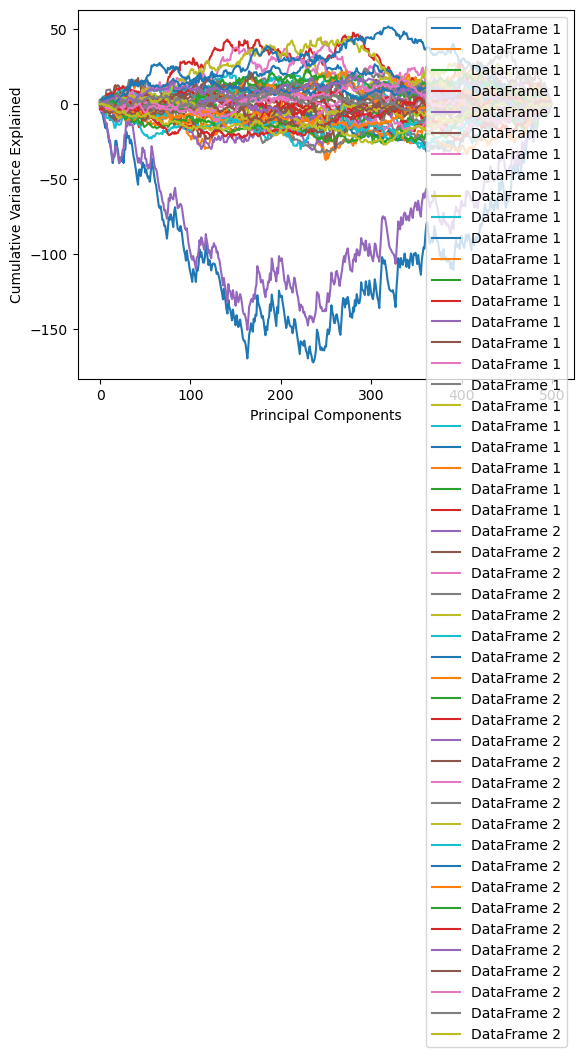

In [56]:
cumulative_variance1 = PCA_df_1.cumsum()
cumulative_variance2 = PCA_df_2.cumsum()

plt.plot(cumulative_variance1, label='DataFrame 1')
plt.plot(cumulative_variance2, label='DataFrame 2')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.show()

## Comparing Variance Explained by each Principal Component

ValueError: x and y must have same first dimension, but have shapes (24,) and (25,)

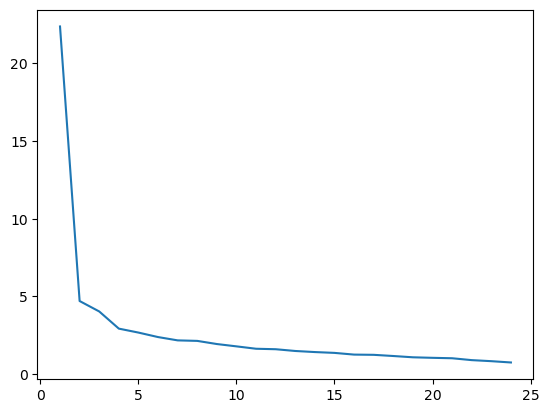

In [57]:
# Step 1: Compute variance explained by each principal component for each dataframe
variance_explained_1 = PCA_df_1.var(axis=0)
variance_explained_2 = PCA_df_2.var(axis=0)

# Step 2: Plot the variance explained
x = range(1, len(variance_explained_1) + 1)  # X-axis values for principal components
plt.plot(x, variance_explained_1, label='PCA_df_1')
plt.plot(x, variance_explained_2, label='PCA_df_2')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.show()

## Comparing Total Variance Explained

In [58]:
# Compute total variance explained for each dataframe
total_variance_1 = PCA_df_1.sum().sum()
total_variance_2 = PCA_df_2.sum().sum()

# Compare the total variances
if total_variance_1 > total_variance_2:
    print("DataFrame 1 has a higher total variance explained.")
elif total_variance_1 < total_variance_2:
    print("DataFrame 2 has a higher total variance explained.")
else:
    print("Both dataframes have the same total variance explained.")

DataFrame 1 has a higher total variance explained.


## Finding out number of components

In [59]:
# Step 1: Compute cumulative variance explained for each dataframe
cumulative_variance1 = PCA_df_1.cumsum()
cumulative_variance2 = PCA_df_2.cumsum()

# Step 2: Identify the target level of combined variance
target_combined_variance = 0.90  # Example target variance of 95%

# Step 3: Find the number of components needed to achieve the target combined variance
num_components1 = cumulative_variance1[cumulative_variance1 >= target_combined_variance].idxmin() + 1
num_components2 = cumulative_variance2[cumulative_variance2 >= target_combined_variance].idxmin() + 1

# Print the number of components required for each dataframe
print(f"Number of components needed for DataFrame 1: {num_components1}")
print(f"Number of components needed for DataFrame 2: {num_components2}")


Number of components needed for DataFrame 1: 0     491
1     382
2     388
3     498
4     440
5     253
6      52
7     477
8     498
9      45
10    494
11     23
12    190
13    475
14     58
15    218
16    497
17     27
18    219
19    378
20      7
21    104
22     61
23    239
dtype: int64
Number of components needed for DataFrame 2: 0     496
1     154
2      23
3     113
4     490
5     497
6     475
7     307
8       9
9     194
10    116
11    336
12     58
13    395
14     58
15    486
16    478
17    469
18    460
19    430
20      7
21    496
22    190
23     39
24    445
dtype: int64


## Comparison of PCs

In [62]:
# Perform PCA on the first dataframe
pca1 = PCA()
pca1.fit(df1)



# Perform PCA on the second dataframe
pca2 = PCA()
pca2.fit(df2)

# Get the loadings for the first dataframe
loadings1 = pca1.components_

# Get the loadings for the second dataframe
loadings2 = pca2.components_

# Calculate the absolute difference between loadings
loadings_diff = np.abs(loadings1 - loadings2)

ValueError: operands could not be broadcast together with shapes (30,30) (31,31) 